## import libraies and packages

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## load the dataset from kaggle repository

In [5]:

df = pd.read_csv("diabetes.csv")  
print( df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
print (df.tail())
print (df.info())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gluco

## fetching the data's splitting the T/t process using KNN Techniques method 


Model Accuracy: 0.6818181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.56      0.49      0.52        55

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154



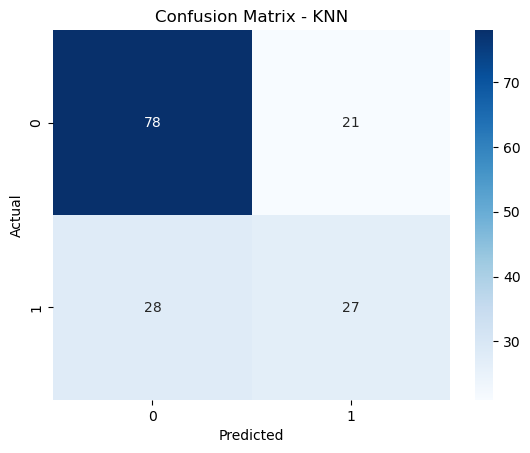

 New Patient Result 
Input: [[2, 150, 70, 20, 85, 28.5, 0.35, 35]]
Prediction: HIGH RISK of Diabetes (85.71%)


C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:


X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

new_patient = [[2, 150, 70, 20, 85, 28.5, 0.35, 35]]  


new_patient_scaled = scaler.transform(new_patient)
prediction = knn.predict(new_patient_scaled)[0]
probability = knn.predict_proba(new_patient_scaled)[0][1] * 100

print(" New Patient Result ")
print("Input:", new_patient)
if prediction == 1:
    print(f"Prediction: HIGH RISK of Diabetes ({probability:.2f}%)")
else:
    print(f"Prediction: LOW RISK of Diabetes ({probability:.2f}%)")
